# PL/VL dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from geodistance import haversine
import numpy as np

In [161]:
df=pd.read_csv("PVOD.csv", encoding='cp1252')
ca=pd.read_csv("county_attribute.csv", encoding='cp1252')
voisin = pd.read_csv("voisin.csv", encoding='cp1252')

In [460]:
df.head()

,YEAR,DEPT_O,DEPT_LIBELLE_O,DEPT_D,DEPT_LIBELLE_D,TMJA_VL_2S,TMJA_PL_2S,start_county_seat,end_county_seat,start_lat,...,end_voisin_2,end_voisin_3,end_voisin_4,end_voisin_5,end_voisin_6,end_voisin_7,end_voisin_8,is_neighbor,distance_category,orientation_4
0,2011,1,Ain,2,Aisne,13,1,Bourg-en-Bresse,Laon,46.21,...,{'W': 80},{'W': 60.0},{'S': 77.0},{'W': 51.0},{'W': 8.0},None,None,False,short,N
1,2011,1,Ain,3,Allier,91,41,Bourg-en-Bresse,Mills,46.21,...,{'W': 71},{'N': 58.0},{'W': 18.0},{'W': 23.0},{'S': 63.0},None,None,False,short,W
2,2011,1,Ain,4,Alpes-de-Haute-Provence,23,0,Bourg-en-Bresse,Digne-les-Bains,46.21,...,{'W': 6},{'N': 5.0},{'W': 26.0},{'W': 84.0},{'W': 13.0},None,None,False,short,S
3,2011,1,Ain,5,Hautes-Alpes,40,3,Bourg-en-Bresse,Gap,46.21,...,{'W': 26},{'N': 38.0},{'N': 73.0},None,None,None,None,False,short,S
4,2011,1,Ain,6,Alpes-Maritimes,93,4,Bourg-en-Bresse,Nice,46.21,...,{'W': 4},{'S': 20.0},None,None,None,None,None,False,short,S


start_county_seat: county seat corresponding to origin department

end_county_seat: county seat corresponding to destination department

start_lat: latitude corresponding to the county seat of origin department

start_lon: longitude corresponding to the county seat of origin department

end_lat: latitude corresponding to the county seat of destination department

end_lon: longitude corresponding to the county seat of destination department

start_codastral_area: acreage corresponding to origin department

end_codastral_area: acreage (km^2) corresponding to destination department

start_population: population (habitant) corresponding to origin department

end_population: population (habitant) corresponding to destination

start_density:  average number of inhabitants per unit area in origin department (inhabitants per square kilometer)

end_density: average number of inhabitants per unit area in destination department (inhabitants per square kilometer)

start_drct_area: direction in France for origin department, N is North, NE is Northeast, SE is Southeast, S is South, SW is Southwest, W is West, NW is Northwest

end_drct_area: direction in France for destination department, N is North, NE is Northeast, SE is Southeast, S is South, SW is Southwest, W is West, NW is Northwest

start_adj: adjacent area corresponding to origin department, 'Suisse' means it is adjacent to Suisse, 'Inland' means it is inland department in France, 'I&O' means Italie and ocean, 'E&A' means Espagne and Andorre, 'B&L' means Belgique and Luxembourg, 'E&O' means Espagne and ocean, 'E&O&A' means Espagne, ocean and Andorre, 'A&S' means Allemagne and Suisse, 'S&I' means Suisse and Italie

end_adj: adjacent area corresponding to destination department

ap_distance: approximate distance, from county seat of origin department to county seat of destination department (km)

start_voisin_1  -  start_voisin_8: all neighobrs of start departments in four directions, North, South, East and West.

end_voisin_1  - end_voisin_8: all neighobrs of end departments in four directions, North, South, East and West.

In [216]:
ca.head()

,Code,Name,county_seat,cadastral_area,Population,Density,Latitude,Longitude,directional_area,Adjacent
0,1,Ain,Bourg-en-Bresse,5762,631877,109.7,46.210,5.210,E,Suisse
1,2,Aisne,Laon,7369,538659,73.1,49.580,3.630,N,Inland
2,3,Allier,Mills,7340,341613,46.5,46.374,3.424,C,Inland
3,4,Alpes-de-Haute-Provence,Digne-les-Bains,6925,161799,23.4,44.093,6.232,SE,Inland
4,5,Hautes-Alpes,Gap,5549,140916,25.4,44.570,6.080,SE,Italie


In [291]:
voisin.head()

,Departement,Voisin_1,Voisin_2,Voisin_3,Voisin_4,Voisin_5,Voisin_6,Voisin_7,Voisin_8
0,1,38,73,74.0,39.0,71.0,69.0,NaN,NaN
1,2,59,80,60.0,77.0,51.0,8.0,NaN,NaN
2,3,42,71,58.0,18.0,23.0,63.0,NaN,NaN
3,4,83,6,5.0,26.0,84.0,13.0,NaN,NaN
4,5,4,26,38.0,73.0,NaN,NaN,NaN,NaN


## Add neighbors of start departments

In [163]:
df['start_voisin_1'] = None
df['start_voisin_2'] = None
df['start_voisin_3'] = None
df['start_voisin_4'] = None
df['start_voisin_5'] = None
df['start_voisin_6'] = None
df['start_voisin_7'] = None
df['start_voisin_8'] = None
df['end_voisin_1'] = None
df['end_voisin_2'] = None
df['end_voisin_3'] = None
df['end_voisin_4'] = None
df['end_voisin_5'] = None
df['end_voisin_6'] = None
df['end_voisin_7'] = None
df['end_voisin_8'] = None

In [280]:
for i in range(len(df.DEPT_O)):
        if  voisin[voisin.Departement == df.DEPT_O[i]].Voisin_1.values[0] == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_1.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_1.values.tolist()[0]].Latitude.values[0] - df.start_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_1.values.tolist()[0]].Longitude.values[0] - df.start_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_1.values.tolist()[0]].Latitude.values[0] - df.start_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_1.values.tolist()[0]].Longitude.values[0] - df.start_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.start_voisin_1[i] = {'N': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_1.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.start_voisin_1[i] = {'S': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_1.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.start_voisin_1[i] = {'W': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_1.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.start_voisin_1[i] = {'E': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_1.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_O[i]].Voisin_2.values[0] == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_2.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_2.values.tolist()[0]].Latitude.values[0] - df.start_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_2.values.tolist()[0]].Longitude.values[0] - df.start_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_2.values.tolist()[0]].Latitude.values[0] - df.start_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_2.values.tolist()[0]].Longitude.values[0] - df.start_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.start_voisin_2[i] = {'N': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_2.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.start_voisin_2[i] = {'S': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_2.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.start_voisin_2[i] = {'W': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_2.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.start_voisin_2[i] = {'E': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_2.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_O[i]].Voisin_3.values[0] == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_3.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_3.values.tolist()[0]].Latitude.values[0] - df.start_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_3.values.tolist()[0]].Longitude.values[0] - df.start_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_3.values.tolist()[0]].Latitude.values[0] - df.start_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_3.values.tolist()[0]].Longitude.values[0] - df.start_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.start_voisin_3[i] = {'N': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_3.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.start_voisin_3[i] = {'S': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_3.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.start_voisin_3[i] = {'W': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_3.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.start_voisin_3[i] = {'E': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_3.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_O[i]].Voisin_4.values[0] == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_4.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_4.values.tolist()[0]].Latitude.values[0] - df.start_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_4.values.tolist()[0]].Longitude.values[0] - df.start_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_4.values.tolist()[0]].Latitude.values[0] - df.start_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_4.values.tolist()[0]].Longitude.values[0] - df.start_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.start_voisin_4[i] = {'N': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_4.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.start_voisin_4[i] = {'S': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_4.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.start_voisin_4[i] = {'W': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_4.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.start_voisin_4[i] = {'E': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_4.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_O[i]].Voisin_5.values[0] == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_5.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_5.values.tolist()[0]].Latitude.values[0] - df.start_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_5.values.tolist()[0]].Longitude.values[0] - df.start_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_5.values.tolist()[0]].Latitude.values[0] - df.start_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_5.values.tolist()[0]].Longitude.values[0] - df.start_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.start_voisin_5[i] = {'N': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_5.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.start_voisin_5[i] = {'S': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_5.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.start_voisin_5[i] = {'W': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_5.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.start_voisin_5[i] = {'E': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_5.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_O[i]].Voisin_6.values[0] == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_6.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_6.values.tolist()[0]].Latitude.values[0] - df.start_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_6.values.tolist()[0]].Longitude.values[0] - df.start_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_6.values.tolist()[0]].Latitude.values[0] - df.start_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_6.values.tolist()[0]].Longitude.values[0] - df.start_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.start_voisin_6[i] = {'N': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_6.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.start_voisin_6[i] = {'S': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_6.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.start_voisin_6[i] = {'W': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_6.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.start_voisin_6[i] = {'E': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_6.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_O[i]].Voisin_7.values[0] == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_7.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_7.values.tolist()[0]].Latitude.values[0] - df.start_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_7.values.tolist()[0]].Longitude.values[0] - df.start_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_7.values.tolist()[0]].Latitude.values[0] - df.start_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_7.values.tolist()[0]].Longitude.values[0] - df.start_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.start_voisin_7[i] = {'N': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_7.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.start_voisin_7[i] = {'S': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_7.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.start_voisin_7[i] = {'W': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_7.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.start_voisin_7[i] = {'E': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_7.values[0]}
        
        if  voisin[voisin.Departement == df.DEPT_O[i]].Voisin_8.values[0] == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_8.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_8.values.tolist()[0]].Latitude.values[0] - df.start_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_8.values.tolist()[0]].Longitude.values[0] - df.start_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_8.values.tolist()[0]].Latitude.values[0] - df.start_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_O[i]].Voisin_8.values.tolist()[0]].Longitude.values[0] - df.start_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.start_voisin_8[i] = {'N': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_8.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.start_voisin_8[i] = {'S': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_8.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.start_voisin_8[i] = {'W': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_8.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.start_voisin_8[i] = {'E': voisin[voisin.Departement == df.DEPT_O[i]].Voisin_8.values[0]}

C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A v

## Add neighbors of arrival departments 

In [281]:
for i in range(len(df.DEPT_D)):
        if  voisin[voisin.Departement == df.DEPT_D[i]].Voisin_1.values[0] == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_1.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_1.values.tolist()[0]].Latitude.values[0] - df.end_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_1.values.tolist()[0]].Longitude.values[0] - df.end_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_1.values.tolist()[0]].Latitude.values[0] - df.end_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_1.values.tolist()[0]].Longitude.values[0] - df.end_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.end_voisin_1[i] = {'N': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_1.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.end_voisin_1[i] = {'S': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_1.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.end_voisin_1[i] = {'W': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_1.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.end_voisin_1[i] = {'E': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_1.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_D[i]].Voisin_2.values[0] == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_2.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_2.values.tolist()[0]].Latitude.values[0] - df.end_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_2.values.tolist()[0]].Longitude.values[0] - df.end_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_2.values.tolist()[0]].Latitude.values[0] - df.end_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_2.values.tolist()[0]].Longitude.values[0] - df.end_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.end_voisin_2[i] = {'N': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_2.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.end_voisin_2[i] = {'S': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_2.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.end_voisin_2[i] = {'W': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_2.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.end_voisin_2[i] = {'E': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_2.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_D[i]].Voisin_3.values[0] == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_3.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_3.values.tolist()[0]].Latitude.values[0] - df.end_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_3.values.tolist()[0]].Longitude.values[0] - df.end_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_3.values.tolist()[0]].Latitude.values[0] - df.end_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_3.values.tolist()[0]].Longitude.values[0] - df.end_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.end_voisin_3[i] = {'N': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_3.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.end_voisin_3[i] = {'S': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_3.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.end_voisin_3[i] = {'W': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_3.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.end_voisin_3[i] = {'E': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_3.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_D[i]].Voisin_4.values[0] == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_4.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_4.values.tolist()[0]].Latitude.values[0] - df.end_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_4.values.tolist()[0]].Longitude.values[0] - df.end_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_4.values.tolist()[0]].Latitude.values[0] - df.end_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_4.values.tolist()[0]].Longitude.values[0] - df.end_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.end_voisin_4[i] = {'N': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_4.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.end_voisin_4[i] = {'S': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_4.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.end_voisin_4[i] = {'W': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_4.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.end_voisin_4[i] = {'E': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_4.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_D[i]].Voisin_5.values[0] == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_5.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_5.values.tolist()[0]].Latitude.values[0] - df.end_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_5.values.tolist()[0]].Longitude.values[0] - df.end_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_5.values.tolist()[0]].Latitude.values[0] - df.end_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_5.values.tolist()[0]].Longitude.values[0] - df.end_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.end_voisin_5[i] = {'N': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_5.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.end_voisin_5[i] = {'S': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_5.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.end_voisin_5[i] = {'W': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_5.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.end_voisin_5[i] = {'E': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_5.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_D[i]].Voisin_6.values[0] == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_6.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_6.values.tolist()[0]].Latitude.values[0] - df.end_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_6.values.tolist()[0]].Longitude.values[0] - df.end_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_6.values.tolist()[0]].Latitude.values[0] - df.end_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_6.values.tolist()[0]].Longitude.values[0] - df.end_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.end_voisin_6[i] = {'N': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_6.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.end_voisin_6[i] = {'S': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_6.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.end_voisin_6[i] = {'W': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_6.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.end_voisin_6[i] = {'E': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_6.values[0]}
                
        if  voisin[voisin.Departement == df.DEPT_D[i]].Voisin_7.values[0] == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_7.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_7.values.tolist()[0]].Latitude.values[0] - df.end_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_7.values.tolist()[0]].Longitude.values[0] - df.end_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_7.values.tolist()[0]].Latitude.values[0] - df.end_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_7.values.tolist()[0]].Longitude.values[0] - df.end_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.end_voisin_7[i] = {'N': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_7.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.end_voisin_7[i] = {'S': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_7.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.end_voisin_7[i] = {'W': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_7.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.end_voisin_7[i] = {'E': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_7.values[0]}
        
        if  voisin[voisin.Departement == df.DEPT_D[i]].Voisin_8.values[0] == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_8.values[0]:
            a = (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_8.values.tolist()[0]].Latitude.values[0] - df.end_lat[i])/ \
            (ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_8.values.tolist()[0]].Longitude.values[0] - df.end_lon[i])
            b = ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_8.values.tolist()[0]].Latitude.values[0] - df.end_lat[i]
            c =ca[ca.Code == voisin[voisin.Departement == df.DEPT_D[i]].Voisin_8.values.tolist()[0]].Longitude.values[0] - df.end_lat[i]
            if (a > 1 or a < -1) and b > 0:
                df.end_voisin_8[i] = {'N': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_8.values[0]}
            if (a > 1 or a < -1) and b < 0:
                df.end_voisin_8[i] = {'S': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_8.values[0]}
            if (a>-1 and a<1) and c < 0:
                df.end_voisin_8[i] = {'W': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_8.values[0]}
            if (a>-1 and a<1) and c > 0:
                df.end_voisin_8[i] = {'E': voisin[voisin.Departement == df.DEPT_D[i]].Voisin_8.values[0]}

C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

### Add is_neighbor attribute

In [427]:
df['is_neighbor']=None

def judge_voisin(x,y,voisin):
    if voisin.loc[voisin.Departement == x][voisin == y].dropna(axis=1, how='any', inplace=False).empty == True:
        return False
    else:
        return True

if __name__ == "__main__":
    df['is_neighbor']=df.apply(lambda row:judge_voisin(row['DEPT_O'],row['DEPT_D'],voisin), axis=1)

### Add distance_category attribute

In [437]:
df['distance_category']=None

def calculate_distance_category(x):
    if x>=0 and x<500:
        return 'short'
    if x>=500 and x<1000:
        return 'medium'
    else:
        return 'long'
    
if __name__ == "__main__":
    df['distance_category']=df.apply(lambda row:calculate_distance_category(row['ap_distance']), axis=1)

### Add orientation_4 attribute

In [448]:
df['orientation_4']=None

def calculate_orientation_category(x1, y1, x2, y2):
    a=y2-y1
    b=x2-x1
    if b!=0:
        if (a/b>1 or a/b<-1) and a>0:
            return 'N'
        if (a/b<1 and a/b>-1) and b>0:
            return 'E'
        if (a/b>1 or a/b<-1) and a<0:
            return 'S'
        if (a/b<1 and a/b>-1) and b<0:
            return 'W'
    if b==0 and a>0:
        return 'N'
    if b==0 and a<0:
        return 'S'
    if b==0 and a==0:
        return 'C'
        
if __name__ == "__main__":
    df['orientation_4']=df.apply(lambda row:calculate_orientation_category(row['start_lon'], row['start_lat'],row['end_lon'],row['end_lat']), axis=1)

### Add orientation_8

In [465]:
df['orientation_8']=None

def calculate_orientation_8_category(x1, y1, x2, y2):
    a=y2-y1
    b=x2-x1
    if b!=0:
        if (a/b>1 or a/b<-1) and a>0 and b > 0:
            return 'N-E'
        if (a/b>1 or a/b<-1) and a>0 and b < 0:
            return 'N-W'
        
        if (a/b<1 and a/b>-1) and b>0 and a > 0:
            return 'E-N'
        if (a/b<1 and a/b>-1) and b>0 and a < 0:
            return 'E-S'
        
        if (a/b>1 or a/b<-1) and a<0 and b > 0:
            return 'S-E'
        if (a/b>1 or a/b<-1) and a<0 and b < 0:
            return 'S-W'
        
        if (a/b<1 and a/b>-1) and b<0 and a > 0:
            return 'W-N'
        if (a/b<1 and a/b>-1) and b<0 and a < 0:
            return 'W-S'
        
    if b==0 and a>0:
        return 'N'
    if b==0 and a<0:
        return 'S'
    if b==0 and a==0:
        return 'C'
        
if __name__ == "__main__":
    df['orientation_8']=df.apply(lambda row:calculate_orientation_8_category(row['start_lon'], row['start_lat'],row['end_lon'],row['end_lat']), axis=1)

# Links among departments

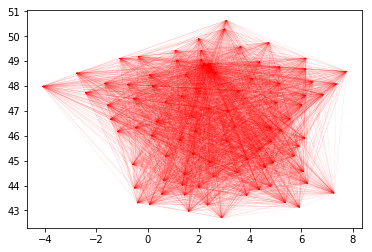

In [120]:
plt.figure('asdf')
aa = plt.gca()
aa.plot([df.start_lon, df.end_lon], [df.start_lat, df.end_lat], color='r', linewidth=0.1, alpha=0.5)
plt.show(aa)

# Distribution of distance

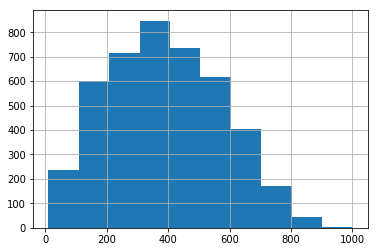

In [180]:
df.ap_distance.hist()

# Distribution of population among departments

C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


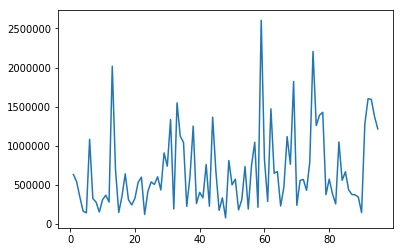

In [222]:
plt.plot(ca.Code.as_matrix(), ca.Population.as_matrix())

C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


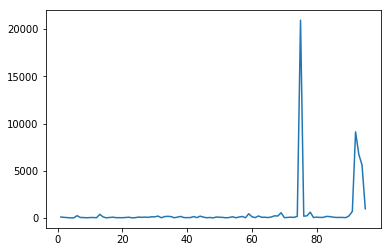

In [223]:
plt.plot(ca.Code.as_matrix(), ca.Density.as_matrix())

C:\Users\Liqun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


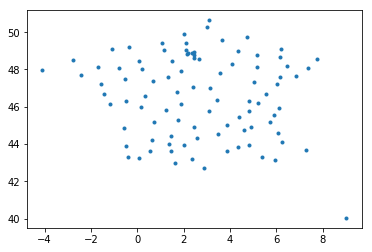

In [225]:
plt.plot(ca.Longitude.as_matrix(), ca.Latitude.as_matrix(),'.')

In [466]:
df.head()

,YEAR,DEPT_O,DEPT_LIBELLE_O,DEPT_D,DEPT_LIBELLE_D,TMJA_VL_2S,TMJA_PL_2S,start_county_seat,end_county_seat,start_lat,...,end_voisin_3,end_voisin_4,end_voisin_5,end_voisin_6,end_voisin_7,end_voisin_8,is_neighbor,distance_category,orientation_4,orientation_8
0,2011,1,Ain,2,Aisne,13,1,Bourg-en-Bresse,Laon,46.21,...,{'W': 60.0},{'S': 77.0},{'W': 51.0},{'W': 8.0},None,None,False,short,N,N-W
1,2011,1,Ain,3,Allier,91,41,Bourg-en-Bresse,Mills,46.21,...,{'N': 58.0},{'W': 18.0},{'W': 23.0},{'S': 63.0},None,None,False,short,W,W-N
2,2011,1,Ain,4,Alpes-de-Haute-Provence,23,0,Bourg-en-Bresse,Digne-les-Bains,46.21,...,{'N': 5.0},{'W': 26.0},{'W': 84.0},{'W': 13.0},None,None,False,short,S,S-E
3,2011,1,Ain,5,Hautes-Alpes,40,3,Bourg-en-Bresse,Gap,46.21,...,{'N': 38.0},{'N': 73.0},None,None,None,None,False,short,S,S-E
4,2011,1,Ain,6,Alpes-Maritimes,93,4,Bourg-en-Bresse,Nice,46.21,...,{'S': 20.0},None,None,None,None,None,False,short,S,S-E


In [468]:
df.to_csv("PVOD.csv", sep=',', encoding='utf-8', index=False)
ca.to_csv("county_attribute.csv", sep=',', encoding='utf-8', index=False)